In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.style.use('dark_background')

In [3]:
data_file = './data/june2021anomalies.txt'
df = pd.read_csv(data_file, sep='\t', skiprows=1)
df

,"i j lon lat array(i,j)"
0,1 1 -179.00 -89.00 -2.3353
1,2 1 -177.00 -89.00 -2.3353
2,3 1 -175.00 -89.00 -2.3353
3,4 1 -173.00 -89.00 -2.3353
4,5 1 -171.00 -89.00 -2.3353
...,...
16195,176 90 171.00 89.00 1.6211
16196,177 90 173.00 89.00 1.6211
16197,178 90 175.00 89.00 1.6211
16198,179 90 177.00 89.00 1.6211


In [4]:
def separateint(element, index):
    return int(element.split()[index])

def separatefloat(element, index):
    return float(element.split()[index])

df['i'] = df[df.columns[0]].apply(separateint, index=0)
df['j'] = df[df.columns[0]].apply(separateint, index=1)
df['lon'] = df[df.columns[0]].apply(separatefloat, index=2)
df['lat'] = df[df.columns[0]].apply(separatefloat, index=3)
df['temp'] = df[df.columns[0]].apply(separatefloat, index=4)
df = df[['i', 'j', 'lon', 'lat', 'temp']]

df

,i,j,lon,lat,temp
0,1,1,-179.0,-89.0,-2.3353
1,2,1,-177.0,-89.0,-2.3353
2,3,1,-175.0,-89.0,-2.3353
3,4,1,-173.0,-89.0,-2.3353
4,5,1,-171.0,-89.0,-2.3353
...,...,...,...,...,...
16195,176,90,171.0,89.0,1.6211
16196,177,90,173.0,89.0,1.6211
16197,178,90,175.0,89.0,1.6211
16198,179,90,177.0,89.0,1.6211


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       16200 non-null  int64  
 1   j       16200 non-null  int64  
 2   lon     16200 non-null  float64
 3   lat     16200 non-null  float64
 4   temp    16200 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 632.9 KB


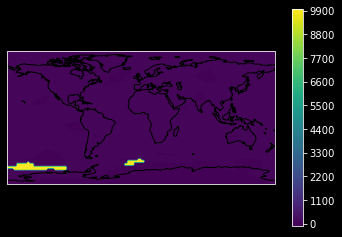

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.contourf(df['lon'].values.reshape((90,180)), 
             df['lat'].values.reshape((90,180)), 
             df['temp'].values.reshape((90,180)), 120,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

In [7]:
def replacewrongtemps(element):
    if element > 20.0:
        return np.nan
    else:
        return element
    
df['temp_clean'] = df['temp'].apply(replacewrongtemps)

In [8]:
df_ca = df[df['lon'].between(-93.4-2, -93.4+17.5+2)]
df_ca = df_ca[df_ca['lat'].between(3, 22)]

In [9]:
df_ca['lon'].value_counts().sort_index()

-95.0    10
-93.0    10
-91.0    10
-89.0    10
-87.0    10
-85.0    10
-83.0    10
-81.0    10
-79.0    10
-77.0    10
-75.0    10
Name: lon, dtype: int64

In [10]:
df_ca['lat'].value_counts().sort_index()

3.0     11
5.0     11
7.0     11
9.0     11
11.0    11
13.0    11
15.0    11
17.0    11
19.0    11
21.0    11
Name: lat, dtype: int64

In [11]:
df_ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 8322 to 9952
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   i           110 non-null    int64  
 1   j           110 non-null    int64  
 2   lon         110 non-null    float64
 3   lat         110 non-null    float64
 4   temp        110 non-null    float64
 5   temp_clean  110 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 6.0 KB


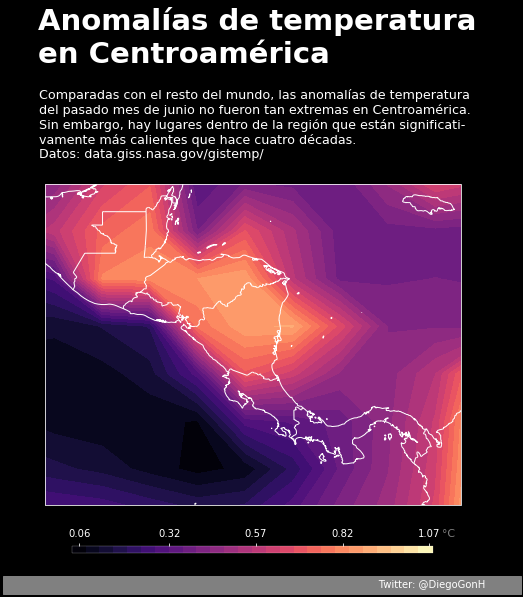

In [177]:
fig = plt.figure(figsize=[6.8, 8.5])
ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree())

for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

# change the color of the axes' tick labels
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

# set the ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks([])
ax.set_yticklabels([])

# THE PLOT
mylon, mylat, diff = -93.4, 19, 17.5
ax.set_extent([mylon, mylon+diff, mylat, mylat-(diff-4)])

ax.add_feature(cfeature.BORDERS, edgecolor='white')
ax.add_feature(cfeature.COASTLINE, edgecolor='white')
pcm = plt.contourf(df_ca['lon'].values.reshape((10,11)), 
                   df_ca['lat'].values.reshape((10,11)), 
                   df_ca['temp_clean'].values.reshape((10,11)), 30,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.magma)

cbar_ticks = np.round(np.linspace(df_ca['temp_clean'].values.min(), df_ca['temp_clean'].values.max(),5),2)

cb = fig.colorbar(pcm, ax=[ax], location='top', aspect=50, shrink=0.95, anchor=(0.0,-6.899),
                  ticks=cbar_ticks)
cb.outline.set_linewidth(0.2)

# ajustar
plt.subplots_adjust(left=0.07, right=0.92, top=0.671)

# titulo y subtitulo
ax.text(-93.7, 24.1, s='Anomalías de temperatura \nen Centroamérica', size=29.1, weight='bold')
subtitle = 'Comparadas con el resto del mundo, las anomalías de temperatura \ndel pasado mes de junio no fueron tan extremas en Centroamérica. \nSin embargo, hay lugares dentro de la región que están significati-\nvamente más calientes que hace cuatro décadas. \nDatos: data.giss.nasa.gov/gistemp/' 
ax.text(-93.67, 20.1, s=subtitle, size=12.7)

# unidades de temperatura
ax.text(-76.707, 4.132, s='°C', size=11., color='grey')

# autor
ax.text(-95, 2, ' ' * 119 + 'Twitter: @DiegoGonH' + ' '*10,
                color='white',
                backgroundcolor='grey')

plt.savefig('anomalias_temp_junio2021_centroamerica.jpg', dpi=128)


plt.show()